In [73]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [84]:
# Import Data
# ts = pd.read_csv('/home/ale/IdeaProjects/Musify/TimeSeries/catalog_metrics.csv', header=0, parse_dates=[0],dayfirst=True,index_col=0)

# ts = pd.read_csv('catalog_metrics.csv', header=0, parse_dates=[0],dayfirst=True,index_col=0)
ts = pd.read_csv('pay_metrics.csv', header=0, parse_dates=[0],dayfirst=True,index_col=0, usecols=[0,1])
ts


,value
timestamp,
2022-03-29 10:19:52.122999808+00:00,1
2022-03-29 10:19:57.127000064+00:00,2
2022-03-29 10:20:02.122999808+00:00,3
2022-03-29 10:20:07.128999936+00:00,4
2022-03-29 10:20:12.125999872+00:00,5
...,...
2022-03-29 10:50:02.124999936+00:00,359
2022-03-29 10:50:07.124000+00:00,360
2022-03-29 10:50:12.122999808+00:00,360


In [85]:
# resample data
tsr = ts.resample(rule='0.16T').mean()
tsr

,value
timestamp,
2022-03-29 10:19:50.400000+00:00,1.5
2022-03-29 10:20:00+00:00,3.5
2022-03-29 10:20:09.600000+00:00,5.5
2022-03-29 10:20:19.200000+00:00,7.5
2022-03-29 10:20:28.800000+00:00,9.5
...,...
2022-03-29 10:49:36+00:00,354.5
2022-03-29 10:49:45.600000+00:00,356.5
2022-03-29 10:49:55.200000+00:00,358.5


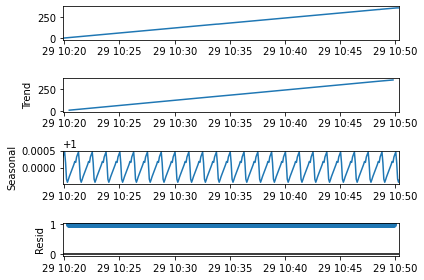

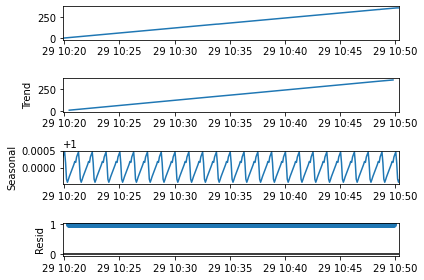

In [88]:
#Highlight seasonability, reside, trend
from statsmodels.tsa.seasonal import seasonal_decompose
decomposedTs = seasonal_decompose(ts,model="mul", period=15)
decomposedTs.plot()

In [77]:
#Split data  training e data test
train_data= tsr.iloc[:170]
test_data=tsr.iloc[170:]
#train_data
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 170 entries, 2022-03-29 09:47:40.800000+00:00 to 2022-03-29 10:14:43.200000+00:00
Freq: 9600L
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   170 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 2022-03-29 10:14:52.800000+00:00 to 2022-03-29 10:18:52.800000+00:00
Freq: 9600L
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   26 non-null     float64
dtypes: float64(1)
memory usage: 416.0 bytes


In [82]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
tsmodel = ExponentialSmoothing(train_data, trend="mul",seasonal=None,seasonal_periods=0.083).fit()
prediction = tsmodel.forecast(100)
prediction

ValueError: endog must be strictly positive when usingmultiplicative trend or seasonal components.

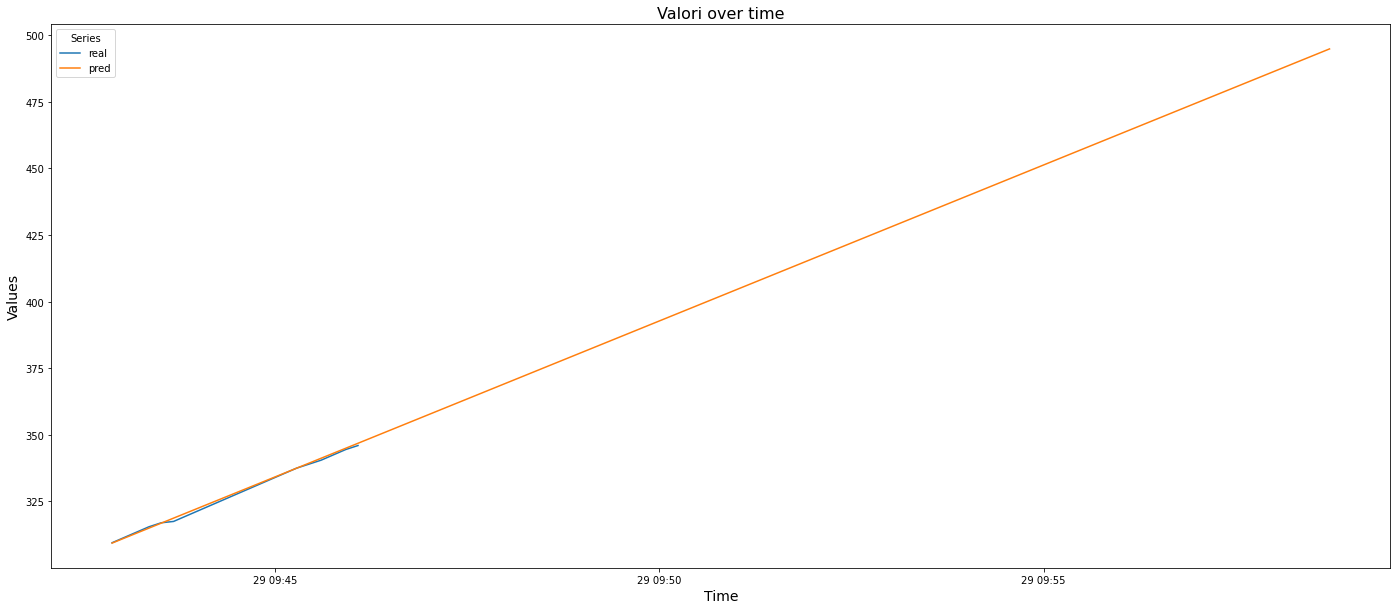

In [72]:
plt.figure(figsize=(24,10))

plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Valori over time', fontsize=16)

plt.plot(test_data,"-",label='real')
plt.plot(prediction,"-",label = 'pred')
plt.legend(title='Series')